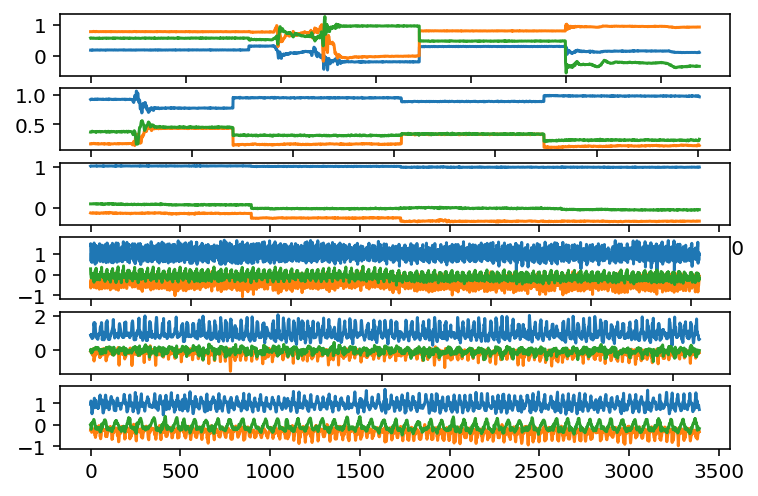

In [1]:
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import pandas as pd
s1l1 = pd.read_csv('HAR\Combined\Train\LAYING\Subject_1.csv')
s1l2 = pd.read_csv('HAR\Combined\Train\SITTING\Subject_1.csv')
s1l3 = pd.read_csv('HAR\Combined\Train\STANDING\Subject_1.csv')
s1l4 = pd.read_csv('HAR\Combined\Train\WALKING\Subject_1.csv')
s1l5 = pd.read_csv('HAR\Combined\Train\WALKING_DOWNSTAIRS\Subject_1.csv')
s1l6 = pd.read_csv('HAR\Combined\Train\WALKING_UPSTAIRS\Subject_1.csv')

fig, ax = plt.subplots(nrows=6)
ax[0].plot(s1l1)
ax[1].plot(s1l2)
ax[2].plot(s1l3)
ax[3].plot(s1l4)
ax[4].plot(s1l5)
ax[5].plot(s1l6)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%config InlineBackend.figure_format='retina'
Laying_df = pd.read_csv('..\HAR\Combined\Train\LAYING\Subject_1.csv')
Sitting_df = pd.read_csv('..\HAR\Combined\Train\SITTING\Subject_1.csv')
Standing_df = pd.read_csv('..\HAR\Combined\Train\STANDING\Subject_1.csv')
Walking_df = pd.read_csv('..\HAR\Combined\Train\WALKING\Subject_1.csv')
WalkingDown_df = pd.read_csv('..\HAR\Combined\Train\WALKING_DOWNSTAIRS\Subject_1.csv')
WalkingUp_df = pd.read_csv('..\HAR\Combined\Train\WALKING_UPSTAIRS\Subject_1.csv')

dfs = [np.sqrt(Laying_df['accx']**2+Laying_df['accy']**2+Laying_df['accz']**2),
       np.sqrt(Sitting_df['accx']**2+Sitting_df['accy']**2+Sitting_df['accz']**2)
       ,np.sqrt(Standing_df['accx']**2+Standing_df['accy']**2+Standing_df['accz']**2)
       ,np.sqrt(Walking_df['accx']**2+Walking_df['accy']**2+Walking_df['accz']**2)
       ,np.sqrt(WalkingDown_df['accx']**2+WalkingDown_df['accy']**2+WalkingDown_df['accz']**2)
       ,np.sqrt(WalkingUp_df['accx']**2+WalkingUp_df['accy']**2+WalkingUp_df['accz']**2)]

labels = ['LAYING','SITTING','STANDING','WALKING','WALKING_DOWN','WALKING_UP']

fig, ax = plt.subplots(nrows=6, figsize=(10, 10))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

for i, df in enumerate(dfs):
    ax[i].plot(df, label=f'{labels[i]}', lw=0.75,color = colors[i])
    ax[i].legend(loc='upper right',fontsize='small') 

# Shared y-label
fig.text(0.04, 0.5, '$(acc_x^2+acc_y^2+acc_z^2)$', va='center', ha='center', rotation='vertical', fontsize=12)
# Shared x-label
fig.text(0.5, 0.04, 'Time (samples)', va='center', ha='center', fontsize=12)
plt.show()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *
np.random.seed(42)

N = 30
P = 5
X = pd.DataFrame(np.random.randn(N, P))
y = pd.Series(np.random.randint(P, size=N), dtype="category")

for criteria in ["information_gain", "gini_index"]:
    tree = DecisionTree(criterion=criteria)  # Split based on Inf. Gain
    tree.fit(X, y)
    y_hat = tree.predict(X)
    tree.plot()
    print("Criteria :", criteria)
    print("Accuracy: ", accuracy(y_hat, y))
    for cls in y.unique():
        print("Precision: ", precision(y_hat, y, cls))
        print("Recall: ", recall(y_hat, y, cls))

Criteria : information_gain


AttributeError: 'NoneType' object has no attribute 'size'

In [ ]:
# X_train_df = pd.read_csv('your_dataset.csv')  # Uncomment and modify if needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate features and labels
X_train = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/train","X_train.txt"),sep='\s+',header=None)
X = X_train  # Features
y = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/train","y_train.txt"),sep='\s+',header=None) # Labels

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(X_pca)
# Create a DataFrame with PCA results and labels
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['activity'] = y

# Plotting
plt.figure(figsize=(10, 8))
for activity in pca_df['activity'].unique():
    subset = pca_df[pca_df['activity'] == activity]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=activity)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Activities')
plt.legend(loc='best', fontsize='small')  # Smaller legend size
plt.grid(True)
plt.show()
